In [1]:
#import all required libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [14]:
# Define stock symbol and time range
stock = 'GOOG'
start = '2012-01-01'
end = '2024-10-21'

# Download stock data
df = yf.download(stock, start=start, end=end)

# Display first few rows
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2012-01-03,16.495001,16.562924,16.171749,16.185880,147611217
2012-01-04,16.566149,16.614984,16.376264,16.485584,114989399
2012-01-05,16.336348,16.459302,16.267433,16.413690,131808205
2012-01-06,16.113497,16.360893,16.107794,16.339821,108119746
2012-01-09,15.430305,16.038633,15.399813,16.026237,233776981


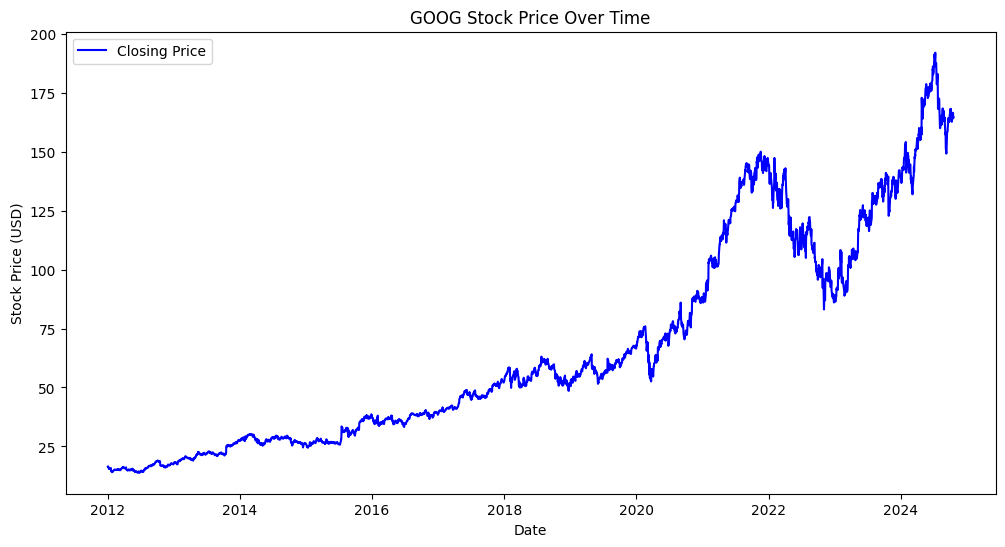

In [16]:
#3.Plot Stock Prices Over Time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label="Closing Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title(f"{stock} Stock Price Over Time")
plt.legend()
plt.show()

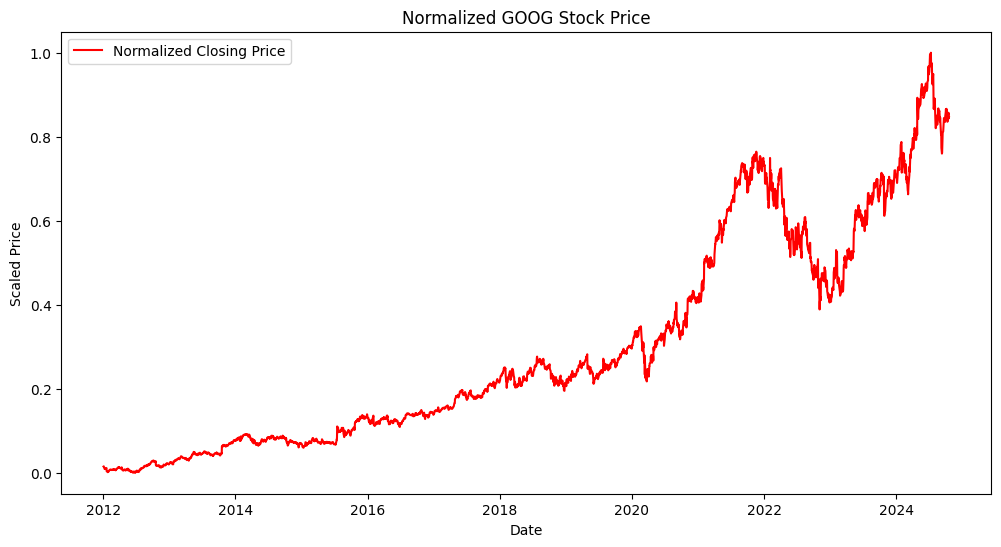

In [18]:
#4
#Normalize the Data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
df['Close_Scaled'] = scaler.fit_transform(df[['Close']])

# Plot Scaled Data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close_Scaled'], label="Normalized Closing Price", color='red')
plt.xlabel("Date")
plt.ylabel("Scaled Price")
plt.title(f"Normalized {stock} Stock Price")
plt.legend()
plt.show()
#OUTPUT:A scaled version of the stock price for LSTM training.

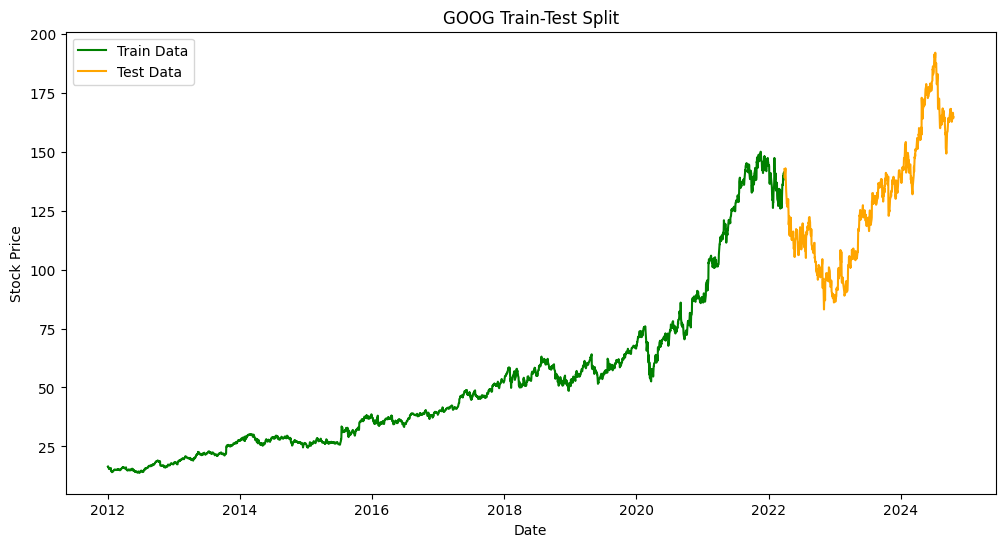

In [20]:
#5.Train-Test Split (80%-20%) for lstm nodel we require sequential split


train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Plot Train vs Test Data
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Close'], label="Train Data", color='green')
plt.plot(test_data.index, test_data['Close'], label="Test Data", color='orange')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"{stock} Train-Test Split")
plt.legend()
plt.show()


In [22]:
#6.Create Time-Series Sequences
# Function to create sequences
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])  # Last 60 days
        y.append(data[i + time_steps])  # Next day's price
    return np.array(X), np.array(y)

# Extract 'Close_Scaled' as NumPy array
train_scaled = train_data['Close_Scaled'].values.reshape(-1, 1)
test_scaled = test_data['Close_Scaled'].values.reshape(-1, 1)

# Create sequences
time_steps = 60
X_train, y_train = create_sequences(train_scaled, time_steps)
X_test, y_test = create_sequences(test_scaled, time_steps)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (2516, 60, 1), y_train shape: (2516, 1)
X_test shape: (584, 60, 1), y_test shape: (584, 1)


In [24]:
#7. Build and Train the LSTM Model

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_steps, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)  # Output layer
])

# Compile Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
#Output: The model starts training with loss values.

C:\Users\Amisha panwar\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - loss: 0.0199 - val_loss: 0.0010
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 8.0834e-04 - val_loss: 9.1370e-04
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 7.5705e-04 - val_loss: 9.3593e-04
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 5.9282e-04 - val_loss: 0.0011
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 5.3482e-04 - val_loss: 8.7003e-04
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 5.4303e-04 - val_loss: 8.9711e-04
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 4.7238e-04 - val_loss: 8.5025e-04
Epoch 9/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 4.4379e-04 - val_loss: 9.2047e-04
Epoch 10/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 4.0982e-04 - val_loss: 0.0012
Epoch 11/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 4.5386e-04 - val_loss: 0.0028
Ep

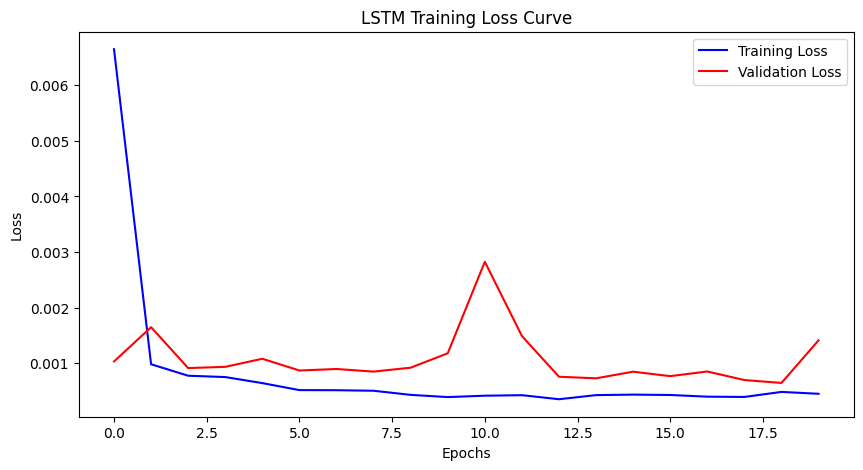

In [25]:
#Plot Training Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Training Loss Curve')
plt.legend()
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


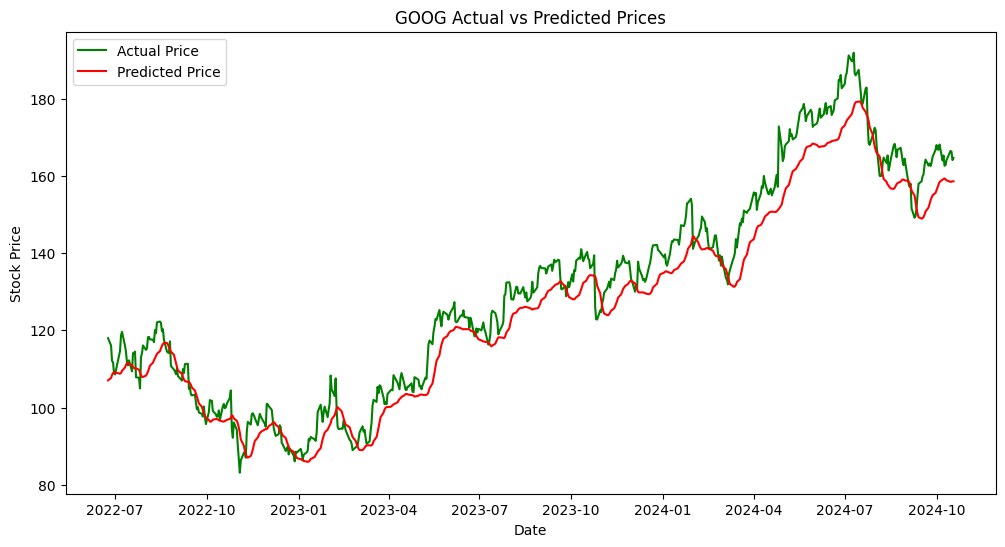

In [26]:
#Predict on X_text
# Make predictions
predicted_prices = model.predict(X_test)

# Inverse transform predictions
predicted_prices = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[time_steps:], y_test_actual, label="Actual Price", color='green')
plt.plot(test_data.index[time_steps:], predicted_prices, label="Predicted Price", color='red')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"{stock} Actual vs Predicted Prices")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━

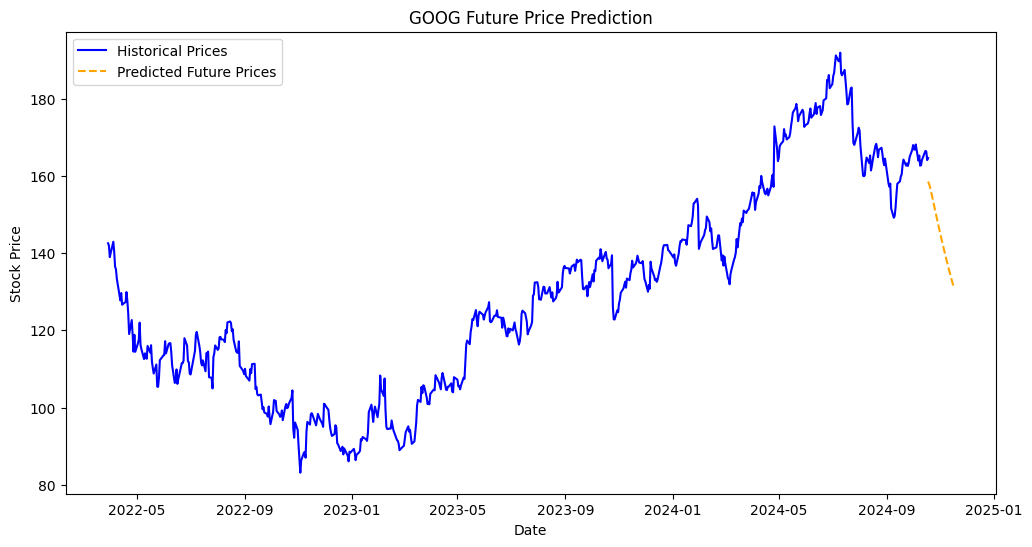

In [27]:
#Predict on Unseen Future Data

def predict_future(model, recent_data, days_to_predict=30):
    predicted_future = []
    input_seq = recent_data[-time_steps:]  # Last 60 days

    for _ in range(days_to_predict):
        input_reshaped = input_seq.reshape(1, time_steps, 1)
        predicted_price = model.predict(input_reshaped)
        predicted_future.append(predicted_price[0][0])

        # Update input sequence with the new prediction
        input_seq = np.append(input_seq[1:], predicted_price, axis=0)

    # Convert back to original scale
    predicted_future = scaler.inverse_transform(np.array(predicted_future).reshape(-1, 1))
    return predicted_future

# Predict next 30 days
future_prices = predict_future(model, test_scaled[-time_steps:])

# Plot Future Predictions
future_dates = pd.date_range(start=test_data.index[-1], periods=30)

plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Close'], label="Historical Prices", color='blue')
plt.plot(future_dates, future_prices, label="Predicted Future Prices", color='orange', linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"{stock} Future Price Prediction")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test_actual,  predicted_prices)
mse = mean_squared_error(y_test_actual,  predicted_prices)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual,  predicted_prices)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


In [28]:
model.save("lstm_stock_prediction.h5")


In [34]:
model.save('my_model.keras')

In [40]:
stock = yf.Ticker("GOOG")
hist = stock.history(period="1mo")
print(hist)

                                 Open        High         Low       Close  \
Date                                                                        
2025-03-03 00:00:00-05:00  173.532301  174.800860  167.449235  168.468079   
2025-03-04 00:00:00-05:00  167.748890  174.965659  167.349336  172.413574   
2025-03-05 00:00:00-05:00  172.123918  175.550008  170.735486  174.790878   
2025-03-06 00:00:00-05:00  172.353650  176.528886  172.311690  174.011765   
2025-03-07 00:00:00-05:00  173.044861  176.698688  172.053986  175.550003   
2025-03-10 00:00:00-04:00  170.160004  170.449997  165.565002  167.809998   
2025-03-11 00:00:00-04:00  166.679993  168.654999  163.240005  165.979996   
2025-03-12 00:00:00-04:00  168.470001  169.529999  165.479996  169.000000   
2025-03-13 00:00:00-04:00  167.979996  168.119995  164.070007  164.729996   
2025-03-14 00:00:00-04:00  165.315002  168.250000  164.509995  167.619995   
2025-03-17 00:00:00-04:00  167.324997  168.460007  165.809998  166.570007   